In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 作業指示 
1.請依照老師影片5-7中，使用pandas_datareader得到 "AAPL" 這間公司股價的所有資料，不用設定資料時間

2.取出最後300筆資料

3.從這300筆資料，取出收盤價close，並轉成numpy_array讓我們在後面使用

4.我們現在要做的，是用前一天的收盤價，預測第二天的收盤價（星期一預測星期二），請依照這個需求，把資料分成題目X(迴歸直線的x座標，表示所有的「前一天收盤價」)，跟答案Y(迴歸直線的y座標，表示所有的「第二天收盤價」) 

5.請把題目X，答案Y再分成佔80%的訓練資料跟佔20%的測試資料

6.請實際的利用訓練資料和scikit learn跑線性回歸，畫圖，並在得到的迴歸直線上，加上訓練資料的資料點(plt.scatter...)，看看你回歸的結果跟實際結果差多少。

In [3]:
import pandas_datareader.data as web

In [5]:
df = web.DataReader('AAPL','yahoo')

In [11]:
df = df[len(df)-300:len(df)]

In [9]:
closed = df['Close']
closed = np.array(closed)

In [15]:
X = closed[0:299]
X = X.reshape(299,1)
Y = closed[1:300]
Y = Y.reshape(299, 1)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=64)

In [17]:
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

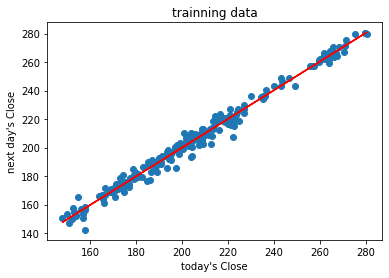

In [20]:
plt.scatter(x_train, y_train)
plt.plot(x_train, r.predict(x_train), 'r')
plt.xlabel("today's Close")
plt.ylabel("next day's Close")
plt.title('trainning data')
plt.show()

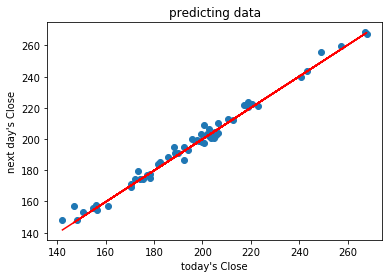

In [21]:
plt.scatter(x_test, y_test)
plt.plot(x_test, r.predict(x_test), 'r')
plt.xlabel("today's Close")
plt.ylabel("next day's Close")
plt.title('predicting data')
plt.show()